# NYC Taxi Trip LR Model

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('IST DSS Notes/ISTDSS ML&EDA/ML&EDA Final Project/nyc_taxi_trip_duration.csv')
df.shape

(729322, 11)

In [3]:
# displaying first 5 rows of the dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Checking missing values

In [4]:
# checking for nulls across entire dataset
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
# identifying datatypes of variables
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
# performing descriptive analysis
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Feature Creation

In [7]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')
#Dropping ID 
df.drop(["id"],axis=1,inplace=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848


In [8]:
#Creating new features 

#Weekday
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
#Hour
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
#Month
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,0,16,16,2,2
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,4,23,23,3,3
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,6,17,18,2,2
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,9,10,1,1
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,2,6,6,2,2


In [9]:
#pip install geopy
# using geopy library for gecoding coordinates latitute and longitude

from geopy.distance import great_circle

In [10]:
# creating a function to calculate distance based on coordinates

def cal_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
 
 start_coordinates=(pickup_latitude,pickup_longitude)
 stop_coordinates=(dropoff_latitude,dropoff_longitude)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [11]:
# calling the function we created to calculate distance

df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,0,16,16,2,2,1.199074
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,4,23,23,3,3,4.129117
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,6,17,18,2,2,7.250763
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,9,10,1,1,2.361101
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,2,6,6,2,2,4.328540


### Outlier Treatment

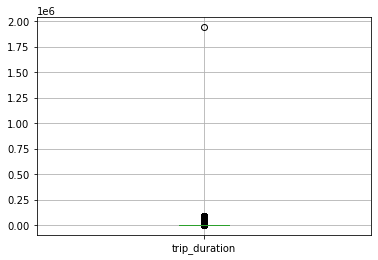

In [12]:
df.boxplot(column='trip_duration') 
plt.show()

In [13]:
# defining upper and lower bounds for trip duration variable

q1 = df['trip_duration'].quantile(0.25) #first quartile value
q3 = df['trip_duration'].quantile(0.75) #third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr

In [14]:
# deciding data range for trip duration to keep or remove from analysis

df_include = df.loc[(df['trip_duration'] >= low) & (df['trip_duration'] <= high)] #meeting the acceptable range
df_exclude = df.loc[(df['trip_duration'] < low) | (df['trip_duration'] > high)] #not meeting the acceptable range

In [15]:
# displaying dimensions of datasets

print(df_include.shape)
print(df_exclude.shape)

(692359, 17)
(36963, 17)


In [16]:
trip_duration_mean=int(df_include.trip_duration.mean()) #finding the mean of the acceptable range
print(trip_duration_mean)

732


In [17]:
df_exclude.trip_duration=trip_duration_mean

C:\Users\kriti\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
df_new=pd.concat([df_include,df_exclude],axis=0) #concatenating both dfs to get the original shape
df_new.shape

(729322, 17)

<AxesSubplot:>

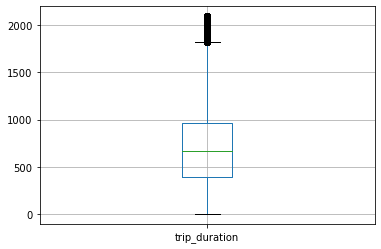

In [19]:
df_new.boxplot(column="trip_duration")

In [20]:
df_new.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                  int64
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
distance                     float64
dtype: object

In [21]:
df_new.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'distance'],
      dtype='object')

#### Dropping non-required Variables

In [22]:
# variables dropped to reduce generalisation error

df_new.drop(['pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
             'dropoff_latitude'],axis=1,inplace=True)
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
0,2,1,0,400,0,0,16,16,2,2,1.199074
1,1,2,0,1100,4,4,23,23,3,3,4.129117
2,2,2,0,1635,6,6,17,18,2,2,7.250763
3,2,6,0,1141,1,1,9,10,1,1,2.361101
4,1,1,0,848,2,2,6,6,2,2,4.328540


In [23]:
df_new.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'distance'],
      dtype='object')

### Assumption of Linearity

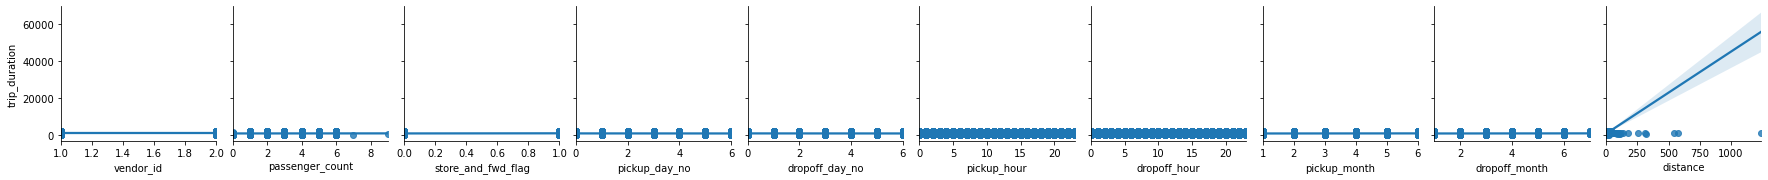

In [25]:
# checking whether the relationship between the dependent variable Y and the independent variable(s) X is linear

#plt.figure(figsize=(30,15))
sns.pairplot(df_new,x_vars=['vendor_id', 'passenger_count', 'store_and_fwd_flag',
                            'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
                            'pickup_month', 'dropoff_month', 'distance'],y_vars="trip_duration",
             kind='reg')
plt.show()

In [26]:
#create x and y 
X = df_new[['vendor_id', 'passenger_count', 'store_and_fwd_flag',
                         'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
                         'pickup_month', 'dropoff_month', 'distance']]
Y = df_new['trip_duration']

### Assumaption of Normality

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

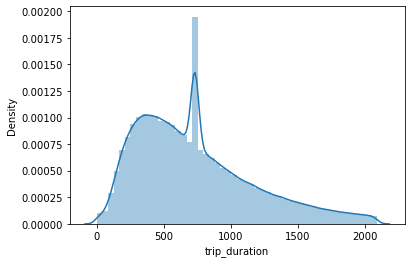

In [27]:
# to check that for any fixed value of X (independent variable) Y (dependent variable) is normally distributed

sns.distplot(Y,hist=True)

array([[<AxesSubplot:title={'center':'vendor_id'}>,
        <AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'store_and_fwd_flag'}>],
       [<AxesSubplot:title={'center':'pickup_day_no'}>,
        <AxesSubplot:title={'center':'dropoff_day_no'}>,
        <AxesSubplot:title={'center':'pickup_hour'}>],
       [<AxesSubplot:title={'center':'dropoff_hour'}>,
        <AxesSubplot:title={'center':'pickup_month'}>,
        <AxesSubplot:title={'center':'dropoff_month'}>],
       [<AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

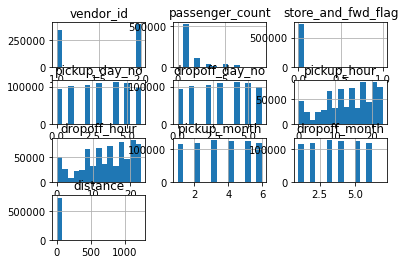

In [28]:
# generating histograms to view data distribution

X.hist(bins=15)

### Assumption of Multicollinearity

                    vendor_id  passenger_count  store_and_fwd_flag  \
vendor_id            1.000000         0.286463           -0.080120   
passenger_count      0.286463         1.000000           -0.020898   
store_and_fwd_flag  -0.080120        -0.020898            1.000000   
pickup_day_no        0.000787         0.025758           -0.001940   
dropoff_day_no       0.000900         0.025941           -0.001748   
pickup_hour          0.009772         0.009851            0.002036   
dropoff_hour         0.009702         0.009214            0.002652   
pickup_month        -0.005363        -0.001481            0.000238   
dropoff_month       -0.005336        -0.001497            0.000244   
distance             0.006510         0.009175            0.027948   

                    pickup_day_no  dropoff_day_no  pickup_hour  dropoff_hour  \
vendor_id                0.000787        0.000900     0.009772      0.009702   
passenger_count          0.025758        0.025941     0.009851      0

<AxesSubplot:>

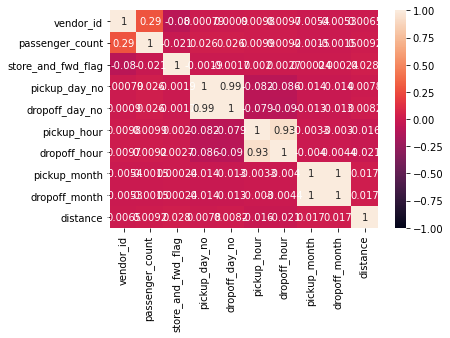

In [29]:
# checking correlation of independent variables amongst each other

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,vendor_id,7.49
1,passenger_count,2.83
2,store_and_fwd_flag,1.01
3,pickup_day_no,286.74
4,dropoff_day_no,287.07
5,pickup_hour,45.77
6,dropoff_hour,44.98
7,pickup_month,44081.30
8,dropoff_month,44083.94
9,distance,1.59


VIF > 1 <= 5 indicates moderate correlation amongst 'independent' variables.
VIF > 5 indicates high correlation amongst 'independent' variables.
The higher the VIF, the higher the possibility that multicollinearity exists, 
and further research is required. When VIF is higher than 10, there is significant multicollinearity that needs to be corrected

In [31]:
list(range(X.shape[1])) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
from sklearn.model_selection import train_test_split 
#split the data into test and train
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
#division value is 75% n 25%

In [33]:
# view dimensions of train and test dataframes

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(583457, 10)
(583457,)
(145865, 10)
(145865,)


In [34]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

532.356022737623
[  0.45605569   2.50897997   1.16576879 -22.70235755  17.75864468
   1.75274242   0.48294545 -46.11615111  54.41441757  43.63163615]


In [35]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('vendor_id', 0.4560556859777006), ('passenger_count', 2.5089799696464663), ('store_and_fwd_flag', 1.1657687889874677), ('pickup_day_no', -22.70235754926296), ('dropoff_day_no', 17.758644683917495), ('pickup_hour', 1.7527424178241444), ('dropoff_hour', 0.482945449529847), ('pickup_month', -46.11615111079873), ('dropoff_month', 54.41441757074285), ('distance', 43.63163614618766)]


In [37]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[671.34329925 649.26873128 677.41306099 ... 584.18485911 840.74363116
 653.35083486]


In [38]:
# scoring the linear model

lm.score(X_train,Y_train)

0.19539993420752588

0.19 indicates that the model has the predictive power to only explain 20% of the variation in the response variable

In [39]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual trip_duration"]=Y_test
new_df["Predicted trip_duration"]=Y_pred
new_df

<ipython-input-39-eb02808ba797>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Actual trip_duration"]=Y_test
<ipython-input-39-eb02808ba797>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Predicted trip_duration"]=Y_pred


,vendor_id,passenger_count,store_and_fwd_flag,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,Actual trip_duration,Predicted trip_duration
201154,1,1,0,0,0,13,13,1,1,2.261204,561,671.343299
661992,1,1,0,0,0,8,8,4,4,1.440906,479,649.268731
351528,2,1,0,2,2,19,19,3,3,1.928658,451,677.413061
353450,2,1,0,1,1,21,21,4,4,0.586390,177,636.561051
177174,1,1,0,4,4,16,17,1,1,9.626767,732,980.130000
...,...,...,...,...,...,...,...,...,...,...,...,...
466451,1,1,0,5,5,21,21,2,2,0.893969,208,613.153803
382607,2,1,0,0,0,13,13,5,5,0.686335,157,636.278289
419583,2,2,0,3,3,8,8,1,1,0.791768,284,584.184859
253301,2,1,0,5,5,4,4,4,4,6.590385,1060,840.743631


In [40]:
print(Y_test.min())
print(Y_test.max())

1
2092


In [41]:
new_df["Deviation"]=new_df["Actual trip_duration"]-new_df["Predicted trip_duration"]
new_df.to_excel("trip_duration Predictions.xlsx",header=True,index=True)
new_df.head()

<ipython-input-41-e5f0cbc6936a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Deviation"]=new_df["Actual trip_duration"]-new_df["Predicted trip_duration"]


,vendor_id,passenger_count,store_and_fwd_flag,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,Actual trip_duration,Predicted trip_duration,Deviation
201154,1,1,0,0,0,13,13,1,1,2.261204,561,671.343299,-110.343299
661992,1,1,0,0,0,8,8,4,4,1.440906,479,649.268731,-170.268731
351528,2,1,0,2,2,19,19,3,3,1.928658,451,677.413061,-226.413061
353450,2,1,0,1,1,21,21,4,4,0.586390,177,636.561051,-459.561051
177174,1,1,0,4,4,16,17,1,1,9.626767,732,980.130000,-248.130000


In [42]:
from sklearn.model_selection import train_test_split

# Split the data into test and train in an 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)

### Regularization

In [43]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

532.3559252455291
[  0.45610094   2.50895879   1.16540102 -22.70066461  17.75695277
   1.75339786   0.48229067 -45.6084446   53.90675083  43.63166281]


In [44]:
Y_pred=lm.predict(X_test)

In [45]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

535.131913769565
[ 0.          1.97313111  0.         -4.77639261 -0.          2.09398352
  0.12263156  1.93789451  6.02129762 43.58645624]


In [46]:
new_df=pd.DataFrame()
new_df=X_train

new_df["trip_duration"]=Y_train
new_df.shape

<ipython-input-46-b03b380a67fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["trip_duration"]=Y_train


(583457, 11)

### Implementing Linear Regression

In [48]:
import statsmodels.formula.api as sm

# create a fitted model with all features
lm_model = sm.ols(formula='trip_duration ~ vendor_id + passenger_count + store_and_fwd_flag + pickup_day_no + dropoff_day_no + pickup_hour + dropoff_hour + pickup_month + dropoff_month + distance', 
                           data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept             532.356023
vendor_id               0.456056
passenger_count         2.508980
store_and_fwd_flag      1.165769
pickup_day_no         -22.702358
dropoff_day_no         17.758645
pickup_hour             1.752742
dropoff_hour            0.482945
pickup_month          -46.116151
dropoff_month          54.414418
distance               43.631636
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                 1.417e+04
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:56:37   Log-Likelihood:            -4.3112e+06
No. Observations:              583457   AIC:                         8.623e+06
Df Residuals:                  583446   BIC:                         

### Evaluating the Model

In [49]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21631708418651752
RMSE: 387.2394266209125
Adj R-square: 0.21630633866210047


In [50]:
new_df.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'distance', 'trip_duration'],
      dtype='object')

In [51]:
# Improving model by dropping unrequired variables

new_df.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_hour', 'dropoff_hour'],axis=1,inplace=True)
new_df.head()

C:\Users\kriti\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,distance,trip_duration
109303,4,4,6,6,3.136627,1001
88884,1,1,3,3,2.351240,1091
406512,6,6,5,5,2.115719,411
147250,2,2,3,3,4.145631,622
651074,5,5,3,3,3.344009,877


In [52]:
#create x and y
x = new_df[['pickup_day_no','dropoff_day_no','pickup_month','dropoff_month','distance']]
y = new_df['trip_duration']

### Scaling the Data

Standardisation is a preprocessing method used to transform continuous data
to make it look normally distributed. In scikit-learn, this is often a necessary step, 
because many models make underlying assumptions that the training data is normally distributed, 
and if it isn't, we could risk biasing our model.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

print(x)

[[ 0.48654153  0.48407042  1.47591897  1.47558235 -0.06908566]
 [-1.04795132 -1.04859115 -0.30819734 -0.30837468 -0.24797014]
 [ 1.50953676  1.50584481  0.88121354  0.88093001 -0.30161379]
 ...
 [-1.55944893 -1.55947834 -0.90290277 -0.90302702 -0.62020217]
 [ 1.50953676  1.50584481  1.47591897  1.47558235  0.23654108]
 [-0.5364537  -0.53770396 -1.49760821 -1.49767937 -0.52276449]]


In [54]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='trip_duration ~ pickup_day_no + dropoff_day_no + pickup_month + dropoff_month + distance', 
                           data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept         569.654370
pickup_day_no     -23.899642
dropoff_day_no     18.391720
pickup_month      -54.164744
dropoff_month      62.425253
distance           43.586599
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                 2.814e+04
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:59:10   Log-Likelihood:            -4.3117e+06
No. Observations:              583457   AIC:                         8.623e+06
Df Residuals:                  583451   BIC:                         8.623e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     

### Evaluating the model

In [55]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
train_x,test_x,train_y,test_y = train_test_split(x, y , random_state = 56)

In [56]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [57]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [58]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 296.4683169393284


In [59]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error', k )

Test Mean Absolute Error 297.69538927186966
